# Visualize numerical results of PAR over one year

Reference: https://github.com/poplarShift/ice-edge/blob/master/iceedge_analysis.ipynb

# First, load libraries

In [1]:
import netcdf_tools
import numpy as np
import vstats

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import rc

plt.close("all")

# Select year

In [2]:
years=range(1,11)
nbyears=len(years)
first_year=np.arange(0,365)
last_year=np.arange(365*(nbyears-1)+0,365*(nbyears-1)+365)
array1d_iT1y_iT=last_year
first_year366=np.arange(0,366) # first year for heatmaps

# Grid

drF is the r cell face separation, meaning the thickness of each depth layer (in m)

it corresponds to delR on https://mitgcm.readthedocs.io/en/latest/getting_started/getting_started.html#grid

In [3]:
gridfile='grid.t001.nc';
drF=netcdf_tools.read_netcdf(gridfile,'drF')

RC is the r coordiante of cell center (in m)

In [4]:
RC=netcdf_tools.read_netcdf(gridfile,'RC')

RF is the r coordinate of cell interface (in m)

In [5]:
RF=netcdf_tools.read_netcdf(gridfile,'RF')

In [6]:
RF_above81=RF[RF>-82]

# Ice

In [7]:
ice=np.fromfile('../../gud_1d_35+16/input_noradtrans/input/siarea.nemo.2016.365.32bits.bin',
                dtype='>f')

In [8]:
iT15=np.nonzero(ice<0.15)[0]
iT15_start=iT15[0]
iT15_end=iT15[-1]

# Configure plots

In [9]:
# adapted from
# https://stackoverflow.com/questions/3899980/how-to-change-the-font-size-on-a-matplotlib-plot
# answer of Pedro M Duarte
SMALL_SIZE = 25
MEDIUM_SIZE = 30
BIGGER_SIZE = 56

# plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the x tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the y tick labels
# plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

# Individual figures of PAR

in $mol\ photons\ m^{-2}\ d^{-1}$

## PAR_ice file

in $mol\ photons\ m^{-2}\ d^{-1}$

In [10]:
array1d_iT_PAR_icefileumolEonm2s=np.fromfile('../../gud_1d_35+16/input_noradtrans/input/1D_NEMO_PARice_y2016.365.32bits.bin',
                                                dtype='>f')
stod=86400 # 3600*24 s per d
array1d_iT_PAR_icefile=array1d_iT_PAR_icefileumolEonm2s*1e-6*stod

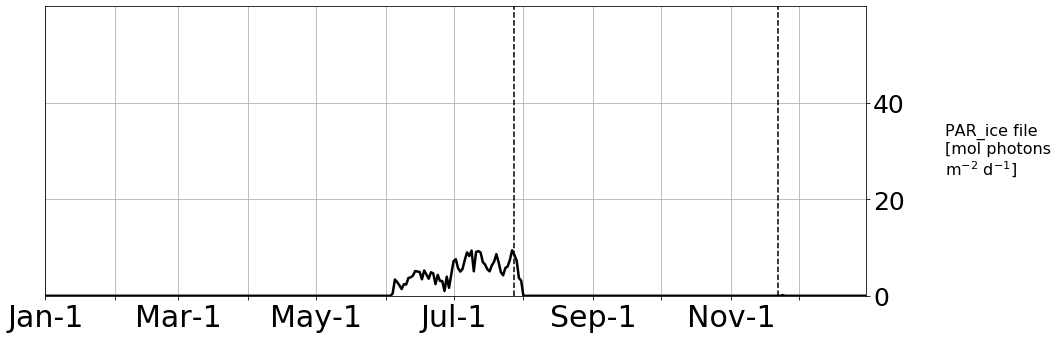

In [11]:
mpl.rc('font', **{'size' : 16})

locs=np.array([1, 32, 60, 91, 121, 152,
              182, 213, 244, 274, 305, 335])
labels=('Jan-1','','Mar-1','','May-1','',
        'Jul-1','','Sep-1','','Nov-1','')

plt.figure(figsize=(15,5))
ax = plt.gca()
ax.set_xticks(locs)
ax.set_xticklabels(labels)
ax.plot(first_year+1,array1d_iT_PAR_icefile,'k-',lw=2.5)
ax.yaxis.tick_right()
ax.grid()
ax.set_xlim(first_year[0]+1,first_year[-1]+1)
ax.set_yticks(range(0,60,20))
ax.set_ylim(0,60)
ax.text(400,30,'PAR_ice file\n[mol photons\nm$^{-2}$ d$^{-1}$]',
        horizontalalignment = 'left',
        verticalalignment = 'center')

# adding the vertical line at 15% of ice
ax.axvline(iT15_start,color='k',linestyle='--')
ax.axvline(iT15_end,  color='k',linestyle='--')

plt.tight_layout()
plt.savefig('1D_NEMO_PARice_y2016.365.32bits.bin.png')

## PAR_ow file

in $mol\ photons\ m^{-2}\ d^{-1}$

In [12]:
array1d_iT_PAR_owfileumolEonm2s=np.fromfile('../../gud_1d_35+16/input_noradtrans/input/1D_GDPS_PAR_y2016.365.32bits.bin',
                                                dtype='>f')
stod=86400 # 3600*24 s per d
array1d_iT_PAR_owfile=array1d_iT_PAR_owfileumolEonm2s*1e-6*stod

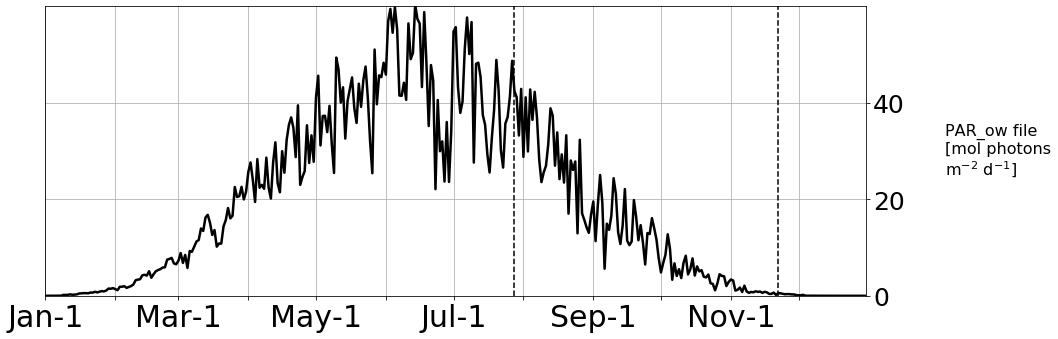

In [13]:
mpl.rc('font', **{'size' : 16})

locs=np.array([1, 32, 60, 91, 121, 152,
              182, 213, 244, 274, 305, 335])
labels=('Jan-1','','Mar-1','','May-1','',
        'Jul-1','','Sep-1','','Nov-1','')

plt.figure(figsize=(15,5))
ax = plt.gca()
ax.set_xticks(locs)
ax.set_xticklabels(labels)
ax.plot(first_year+1,array1d_iT_PAR_owfile,'k-',lw=2.5)
ax.yaxis.tick_right()
ax.grid()
ax.set_xlim(first_year[0]+1,first_year[-1]+1)
ax.set_yticks(range(0,60,20))
ax.set_ylim(0,60)
ax.text(400,30,'PAR_ow file\n[mol photons\nm$^{-2}$ d$^{-1}$]',
        horizontalalignment = 'left',
        verticalalignment = 'center')

# adding the vertical line at 15% of ice
ax.axvline(iT15_start,color='k',linestyle='--')
ax.axvline(iT15_end,  color='k',linestyle='--')

plt.tight_layout()
plt.savefig('1D_GDPS_PAR_y2016.365.32bits.bin.png')

## sPAR_ice

In [14]:
twodfile='2d.0000000000.t001.nc'
array1d_iT_sPAR_icefullumolEm2s=netcdf_tools.read_netcdf(twodfile, 'sPAR_ice').squeeze()
array1d_iT_sPAR_iceumolEm2s=array1d_iT_sPAR_icefullumolEm2s[array1d_iT1y_iT]
stod=86400 # 3600*24 s per d
array1d_iT_sPAR_ice=array1d_iT_sPAR_iceumolEm2s*1e-6*stod

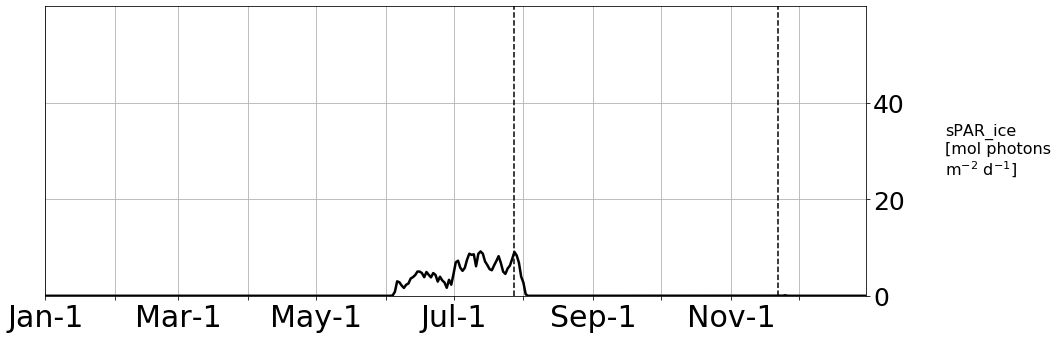

In [15]:
mpl.rc('font', **{'size' : 16})

locs=np.array([1, 32, 60, 91, 121, 152,
              182, 213, 244, 274, 305, 335])
labels=('Jan-1','','Mar-1','','May-1','',
        'Jul-1','','Sep-1','','Nov-1','')

plt.figure(figsize=(15,5))
ax = plt.gca()
ax.set_xticks(locs)
ax.set_xticklabels(labels)
ax.plot(first_year+1,array1d_iT_sPAR_ice,'k-',lw=2.5)
ax.yaxis.tick_right()
ax.grid()
ax.set_xlim(first_year[0]+1,first_year[-1]+1)
ax.set_yticks(range(0,60,20))
ax.set_ylim(0,60)
ax.text(400,30,'sPAR_ice\n[mol photons\nm$^{-2}$ d$^{-1}$]',
        horizontalalignment = 'left',
        verticalalignment = 'center')

# adding the vertical line at 15% of ice
ax.axvline(iT15_start,color='k',linestyle='--')
ax.axvline(iT15_end,  color='k',linestyle='--')

plt.tight_layout()
plt.savefig('2d.0000000000.t001.lastyear.spar_ice.png')

## sPAR_ow

In [16]:
twodfile='2d.0000000000.t001.nc'
array1d_iT_sPAR_owfullumolEm2s=netcdf_tools.read_netcdf(twodfile, 'sPAR_ow').squeeze()
array1d_iT_sPAR_owumolEm2s=array1d_iT_sPAR_owfullumolEm2s[array1d_iT1y_iT]
stod=86400 # 3600*24 s per d
array1d_iT_sPAR_ow=array1d_iT_sPAR_owumolEm2s*1e-6*stod

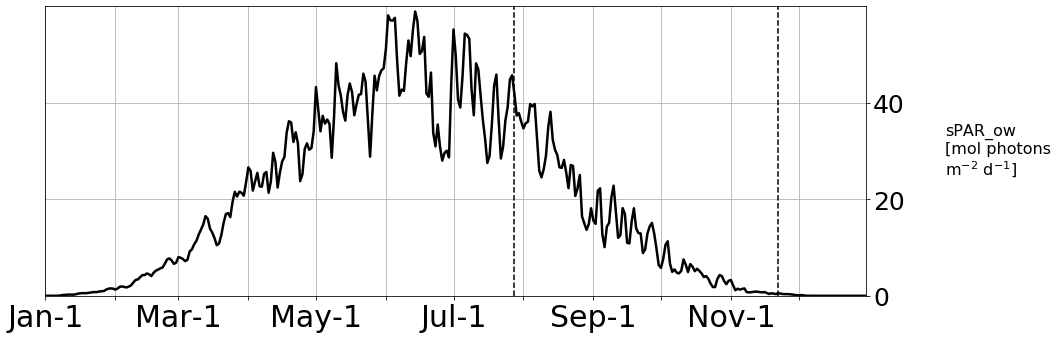

In [17]:
mpl.rc('font', **{'size' : 16})

locs=np.array([1, 32, 60, 91, 121, 152,
              182, 213, 244, 274, 305, 335])
labels=('Jan-1','','Mar-1','','May-1','',
        'Jul-1','','Sep-1','','Nov-1','')

plt.figure(figsize=(15,5))
ax = plt.gca()
ax.set_xticks(locs)
ax.set_xticklabels(labels)
ax.plot(first_year+1,array1d_iT_sPAR_ow,'k-',lw=2.5)
ax.yaxis.tick_right()
ax.grid()
ax.set_xlim(first_year[0]+1,first_year[-1]+1)
ax.set_yticks(range(0,60,20))
ax.set_ylim(0,60)
ax.text(400,30,'sPAR_ow\n[mol photons\nm$^{-2}$ d$^{-1}$]',
        horizontalalignment = 'left',
        verticalalignment = 'center')

# adding the vertical line at 15% of ice
ax.axvline(iT15_start,color='k',linestyle='--')
ax.axvline(iT15_end,  color='k',linestyle='--')

plt.tight_layout()
plt.savefig('2d.0000000000.t001.lastyear.spar_ow.png')

## PARF

PARF is the PAR at the top of the layer.

In [18]:
carfile='car.0000000000.t001.nc'
array2d_idepth_iT_PARFfullumolEonm2s=netcdf_tools.read_netcdf(carfile, 'PARF').squeeze().transpose()
stod=86400 # 3600*24 s per d
array2d_idepth_iT_PARFfull=array2d_idepth_iT_PARFfullumolEonm2s*1e-6*stod

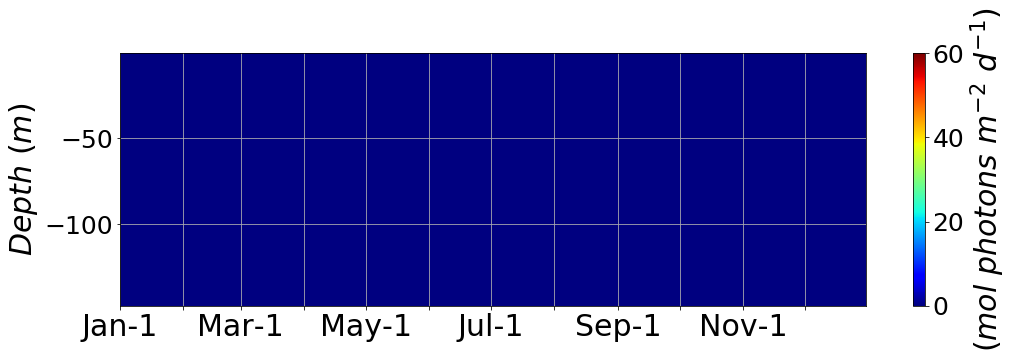

In [19]:
mpl.rc('font', **{'size' : 16})

locs=np.array([1, 32, 60, 91, 121, 152,
              182, 213, 244, 274, 305, 335])
labels=('Jan-1','','Mar-1','','May-1','',
        'Jul-1','','Sep-1','','Nov-1','')

RC_above151=RC[RC>-151]

plt.figure(figsize=(15,5))
ax = plt.gca()
h=ax.pcolormesh(first_year366+1,
                RC_above151,
                array2d_idepth_iT_PARFfull[1:RC_above151.size,array1d_iT1y_iT],
                cmap='jet',
                vmin=0,
                vmax=60
              )
ax.set_xticklabels([])
ax.set_ylabel('$Depth\ (m)$')
ax.set_xlim(first_year366[0]+1,first_year[-1]+1)
ax.grid()
ax.set_xticks(locs)
ax.set_xticklabels(labels)
cbar=plt.colorbar(h)
cbar.set_label('$(mol\ photons\ m^{-2}\ d^{-1})$')
plt.tight_layout()
plt.savefig('car.0000000000.t001.lastyear.parf.png')

## PAR

PAR is the PAR at the center of the layer.

In [20]:
array2d_idepth_iT_PARfullumolEonm2s=netcdf_tools.read_netcdf(carfile, 'PAR').squeeze().transpose()
array2d_idepth_iT_PARfull=array2d_idepth_iT_PARfullumolEonm2s*1e-6*stod

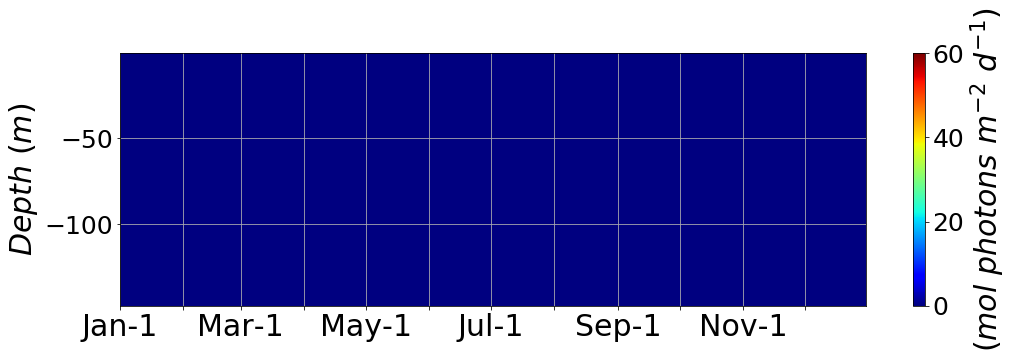

In [21]:
mpl.rc('font', **{'size' : 16})

locs=np.array([1, 32, 60, 91, 121, 152,
              182, 213, 244, 274, 305, 335])
labels=('Jan-1','','Mar-1','','May-1','',
        'Jul-1','','Sep-1','','Nov-1','')

RC_above151=RC[RC>-151]

plt.figure(figsize=(15,5))
ax = plt.gca()
h=ax.pcolormesh(first_year366+1,
                RC_above151,
                array2d_idepth_iT_PARfull[1:RC_above151.size,array1d_iT1y_iT],
                cmap='jet',
                vmin=0,
                vmax=60
              )
ax.set_xticklabels([])
ax.set_ylabel('$Depth\ (m)$')
ax.set_xlim(first_year366[0]+1,first_year[-1]+1)
ax.grid()
ax.set_xticks(locs)
ax.set_xticklabels(labels)
cbar=plt.colorbar(h)
cbar.set_label('$(mol\ photons\ m^{-2}\ d^{-1})$')
plt.tight_layout()
plt.savefig('car.0000000000.t001.lastyear.par_ice.png')

# One figure

In [22]:
plt.rcdefaults()

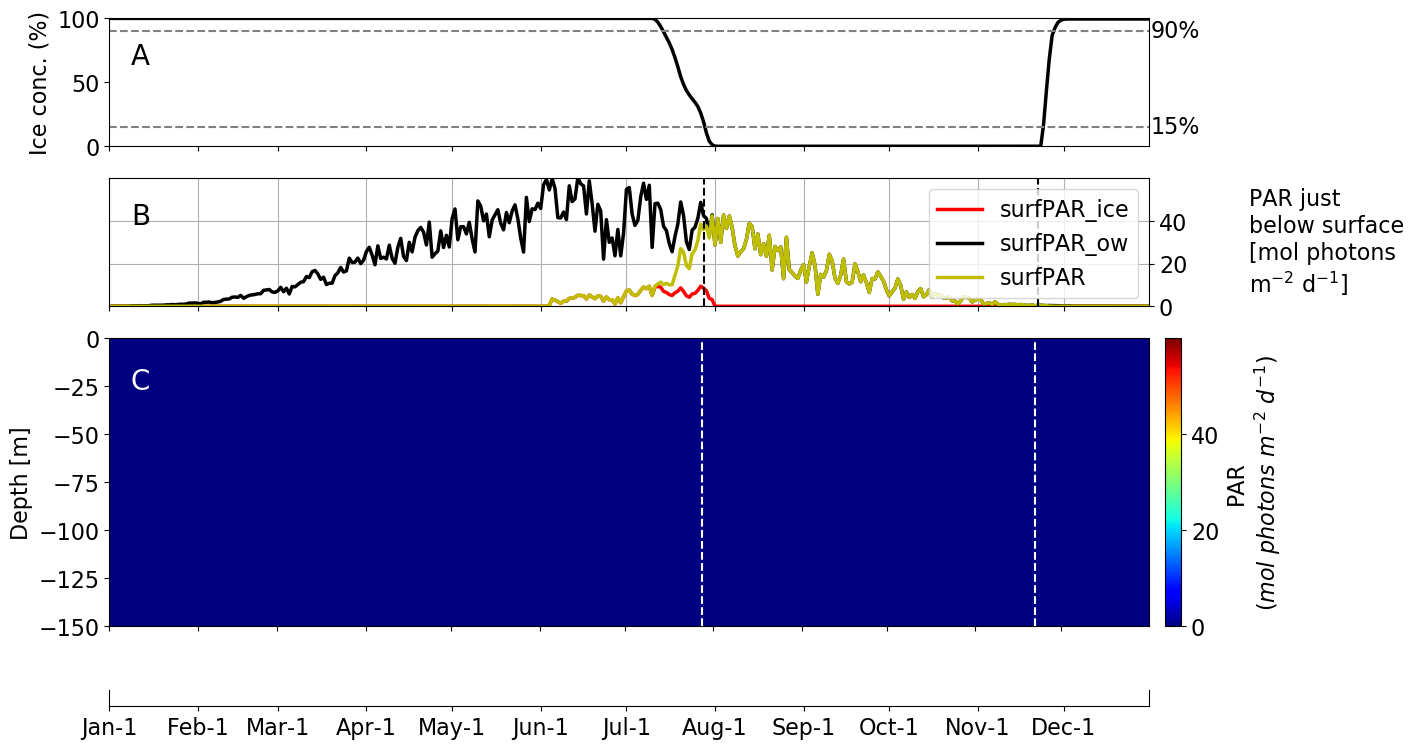

In [23]:
mpl.rc('font', **{'size' : 16})

locs=np.array([1, 32, 60, 91, 121, 152,
              182, 213, 244, 274, 305, 335])
labels=('Jan-1','Feb-1','Mar-1','Apr-1','May-1','Jun-1',
        'Jul-1','Aug-1','Sep-1','Oct-1','Nov-1','Dec-1')

fig,axs=plt.subplots(4,1,sharex=False,figsize=(16, 16))

# --- ICE CONCENTRATIONS
ax=axs[0]
ax.plot(first_year+1,ice*100,'k-',lw=2.5)
ax.set_xlim(first_year[0]+1,first_year[-1]+1)
xlims=ax.get_xlim()
ax.set_xticks(locs)
ax.set_xticklabels([])
ax.set_ylabel('Ice conc. (%)')
ax.set_ylim(0,100)
ax.plot(xlims,[15,15],'k--',color='gray')
ax.plot(xlims,[90,90],'k--',color='gray')
ax.text(xlims[1]+.5,15,'15%',verticalalignment='center')
ax.text(xlims[1]+.5,90,'90%',verticalalignment='center')
plt.text(0.03,0.7,'A',
         horizontalalignment = 'center',verticalalignment='center',
         transform=ax.transAxes, fontsize=20)

# --- PANEL B: PAR JUST BELOW SURFACE
array1d_iT_surfPAR=array1d_iT_PAR_owfile*(1-ice)+array1d_iT_PAR_icefile*ice
ax=axs[1]
ax.set_xticklabels([])
ax.set_xticks(locs)
h1=ax.plot(first_year+1,array1d_iT_PAR_icefile,'r-',lw=2.5)
ax.yaxis.tick_right()
ax.grid()
ax.set_xlim(xlims)
ax.set_yticks(range(0,60,20))
ax.set_ylim(0,60)
ax.text(400,30,'PAR just\nbelow surface\n[mol photons\nm$^{-2}$ d$^{-1}$]',
        horizontalalignment = 'left',
        verticalalignment = 'center')
plt.text(0.03,0.7,'B',
         horizontalalignment = 'center',verticalalignment='center',
         transform=ax.transAxes, fontsize=20)
h2=ax.plot(first_year+1,array1d_iT_PAR_owfile,'k-',lw=2.5)
h3=ax.plot(first_year+1,array1d_iT_surfPAR,'y-',lw=2.5)
ax.legend([h1[0],h2[0],h3[0]],['surfPAR_ice','surfPAR_ow','surfPAR'],loc=1)

# adding the vertical lines at 15% of ice
ax.axvline(iT15_start,color='k',linestyle='--')
ax.axvline(iT15_end,  color='k',linestyle='--')

# --- PANEL C: PAR
ax=axs[2]
RF_above151=RF[RF>-151]
h=ax.pcolormesh(first_year366+1,
                RF_above151,
                array2d_idepth_iT_PARfull[0:(RF_above151.size)-1,array1d_iT1y_iT],
                cmap='jet',
                vmin=0,
                vmax=60
              )
ax.set_xticks(locs)
ax.set_xticklabels([])
ax.set_ylabel('Depth [m]')
ax.set_ylim(-150,0)

# adding the colorbar
cbaxes = fig.add_axes([0.78, 0.58, 0.01, 0.18])
yticks=np.arange(0,60,20)
cb = plt.colorbar(h,
                  cax=cbaxes,
                  ticks=yticks
                 )
cb.set_label('PAR\n($mol\ photons\ m^{-2}\ d^{-1}$)')

# adding the vertical lines at 15% of ice
ax.axvline(iT15_start,color='w',linestyle='--')
ax.axvline(iT15_end,  color='w',linestyle='--')

plt.text(0.03,0.85,'C',
         horizontalalignment = 'center',verticalalignment='center',
         transform=ax.transAxes, fontsize=20, color='w')

# --- ADDITIONAL X-AXIS
ax=axs[3]
ax.set_xlim(xlims)
ax.set_xticks(locs)
ax.set_xticklabels(labels)
ax.axes.get_yaxis().set_visible(False)
ax.spines['top'].set_visible(False)

# --- POSITION
axs[0].set_position( [0.12,0.88  ,0.65,.08])
axs[1].set_position( [0.12,0.78  ,0.65,.08])
axs[2].set_position( [0.12,0.58  ,0.65,.18])
axs[3].set_position( [0.12,0.53  ,0.65,.01])

# --- SAVE
plt.savefig('one_year_par.png')